In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 1024.", name="epoch 100")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=100, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4206592   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 4,232,217
Trainable params: 4,232,217
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
1/5 [=====>........................] - ETA: 6s - loss: 1.4544 - mae: 1.1396

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 7s 1s/step - loss: 1.2546 - mae: 1.0012 - val_loss: 0.6044 - val_mae: 0.6777
Epoch 2/100
4/5 [=======================>......] - ETA: 0s - loss: 0.3736 - mae: 0.5028

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.3628 - mae: 0.4957 - val_loss: 0.2004 - val_mae: 0.3667
Epoch 3/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1923 - mae: 0.3636

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.1902 - mae: 0.3615 - val_loss: 0.1945 - val_mae: 0.3712
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.1928 - mae: 0.3615

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1928 - mae: 0.3615 - val_loss: 0.1748 - val_mae: 0.3492
Epoch 5/100
5/5 [==============================] - 1s 129ms/step - loss: 0.1825 - mae: 0.3546 - val_loss: 0.1777 - val_mae: 0.3499
Epoch 6/100
5/5 [==============================] - 0s 93ms/step - loss: 0.1757 - mae: 0.3481 - val_loss: 0.1757 - val_mae: 0.3529
Epoch 7/100
5/5 [==============================] - 0s 79ms/step - loss: 0.1836 - mae: 0.3548 - val_loss: 0.1761 - val_mae: 0.3528
Epoch 8/100
1/5 [=====>........................] - ETA: 0s - loss: 0.1688 - mae: 0.3301

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1725 - mae: 0.3447 - val_loss: 0.1735 - val_mae: 0.3452
Epoch 9/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1836 - mae: 0.3548

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1813 - mae: 0.3518 - val_loss: 0.1701 - val_mae: 0.3423
Epoch 10/100
2/5 [===========>..................] - ETA: 0s - loss: 0.1609 - mae: 0.3318

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1684 - mae: 0.3409 - val_loss: 0.1670 - val_mae: 0.3435
Epoch 11/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1697 - mae: 0.3415

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1676 - mae: 0.3394 - val_loss: 0.1569 - val_mae: 0.3310
Epoch 12/100
5/5 [==============================] - 1s 120ms/step - loss: 0.1525 - mae: 0.3214 - val_loss: 0.1594 - val_mae: 0.3324
Epoch 13/100
1/5 [=====>........................] - ETA: 0s - loss: 0.1254 - mae: 0.2851

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1480 - mae: 0.3150 - val_loss: 0.1388 - val_mae: 0.3100
Epoch 14/100
5/5 [==============================] - 1s 117ms/step - loss: 0.1730 - mae: 0.3374 - val_loss: 0.1492 - val_mae: 0.3234
Epoch 15/100
5/5 [==============================] - 0s 72ms/step - loss: 0.1532 - mae: 0.3232 - val_loss: 0.1462 - val_mae: 0.3175
Epoch 16/100
1/5 [=====>........................] - ETA: 0s - loss: 0.1322 - mae: 0.2974

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1447 - mae: 0.3153 - val_loss: 0.1334 - val_mae: 0.3046
Epoch 17/100
5/5 [==============================] - 0s 95ms/step - loss: 0.1408 - mae: 0.3110 - val_loss: 0.1376 - val_mae: 0.3042
Epoch 18/100
1/5 [=====>........................] - ETA: 0s - loss: 0.1505 - mae: 0.3172

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1170 - mae: 0.2793 - val_loss: 0.0931 - val_mae: 0.2458
Epoch 19/100
2/5 [===========>..................] - ETA: 0s - loss: 0.0808 - mae: 0.2258

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1093 - mae: 0.2669 - val_loss: 0.0829 - val_mae: 0.2334
Epoch 20/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0817 - mae: 0.2288

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0831 - mae: 0.2311 - val_loss: 0.0698 - val_mae: 0.2094
Epoch 21/100
5/5 [==============================] - 1s 116ms/step - loss: 0.0724 - mae: 0.2126 - val_loss: 0.0798 - val_mae: 0.2148
Epoch 22/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0680 - mae: 0.2026 - val_loss: 0.0771 - val_mae: 0.2191
Epoch 23/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0730 - mae: 0.2136

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0677 - mae: 0.2039 - val_loss: 0.0604 - val_mae: 0.1884
Epoch 24/100
5/5 [==============================] - 1s 121ms/step - loss: 0.0618 - mae: 0.1915 - val_loss: 0.0614 - val_mae: 0.1933
Epoch 25/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0625 - mae: 0.1908

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0605 - mae: 0.1892 - val_loss: 0.0586 - val_mae: 0.1852
Epoch 26/100
3/5 [=================>............] - ETA: 0s - loss: 0.0589 - mae: 0.1853

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0590 - mae: 0.1858 - val_loss: 0.0579 - val_mae: 0.1848
Epoch 27/100
5/5 [==============================] - 1s 94ms/step - loss: 0.0580 - mae: 0.1839 - val_loss: 0.0583 - val_mae: 0.1846
Epoch 28/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0583 - mae: 0.1844 - val_loss: 0.0612 - val_mae: 0.1879
Epoch 29/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0662 - mae: 0.1962

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0586 - mae: 0.1848 - val_loss: 0.0573 - val_mae: 0.1820
Epoch 30/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0563 - mae: 0.1818

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0571 - mae: 0.1824 - val_loss: 0.0563 - val_mae: 0.1820
Epoch 31/100
5/5 [==============================] - ETA: 0s - loss: 0.0569 - mae: 0.1822

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0569 - mae: 0.1822 - val_loss: 0.0562 - val_mae: 0.1808
Epoch 32/100
5/5 [==============================] - 1s 121ms/step - loss: 0.0571 - mae: 0.1831 - val_loss: 0.0571 - val_mae: 0.1829
Epoch 33/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0570 - mae: 0.1829 - val_loss: 0.0808 - val_mae: 0.2054
Epoch 34/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0792 - mae: 0.2224 - val_loss: 0.0837 - val_mae: 0.2370
Epoch 35/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0840 - mae: 0.2358 - val_loss: 0.0656 - val_mae: 0.2031
Epoch 36/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0690 - mae: 0.2054 - val_loss: 0.0722 - val_mae: 0.2047
Epoch 37/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0615 - mae: 0.1916 - val_loss: 0.0678 - val_mae: 0.2031
Epoch 38/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0645 - mae: 0.1969 - v

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0597 - mae: 0.1878 - val_loss: 0.0560 - val_mae: 0.1801
Epoch 57/100
5/5 [==============================] - 1s 112ms/step - loss: 0.0590 - mae: 0.1869 - val_loss: 0.0569 - val_mae: 0.1814
Epoch 58/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0579 - mae: 0.1847 - val_loss: 0.0592 - val_mae: 0.1861
Epoch 59/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0568 - mae: 0.1820 - val_loss: 0.0566 - val_mae: 0.1809
Epoch 60/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0560 - mae: 0.1813 - val_loss: 0.0578 - val_mae: 0.1826
Epoch 61/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0567 - mae: 0.1820 - val_loss: 0.0579 - val_mae: 0.1831
Epoch 62/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0530 - mae: 0.1730

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0570 - mae: 0.1835 - val_loss: 0.0558 - val_mae: 0.1793
Epoch 63/100
5/5 [==============================] - 1s 123ms/step - loss: 0.0560 - mae: 0.1801 - val_loss: 0.0573 - val_mae: 0.1851
Epoch 64/100
5/5 [==============================] - 0s 94ms/step - loss: 0.0585 - mae: 0.1860 - val_loss: 0.0574 - val_mae: 0.1859
Epoch 65/100
5/5 [==============================] - 0s 81ms/step - loss: 0.0573 - mae: 0.1838 - val_loss: 0.0563 - val_mae: 0.1829
Epoch 66/100
5/5 [==============================] - 0s 71ms/step - loss: 0.0567 - mae: 0.1836 - val_loss: 0.0623 - val_mae: 0.1896
Epoch 67/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0573 - mae: 0.1850 - val_loss: 0.0583 - val_mae: 0.1828
Epoch 68/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0564 - mae: 0.1820 - val_loss: 0.0559 - val_mae: 0.1809
Epoch 69/100
5/5 [==============================] - 0s 71ms/step - loss: 0.0551 - mae: 0.1792 - v

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0561 - mae: 0.1811 - val_loss: 0.0555 - val_mae: 0.1815
Epoch 72/100
5/5 [==============================] - 1s 129ms/step - loss: 0.0559 - mae: 0.1820 - val_loss: 0.0558 - val_mae: 0.1831
Epoch 73/100
5/5 [==============================] - 0s 95ms/step - loss: 0.0570 - mae: 0.1832 - val_loss: 0.0573 - val_mae: 0.1828
Epoch 74/100
5/5 [==============================] - 0s 84ms/step - loss: 0.0553 - mae: 0.1803 - val_loss: 0.0556 - val_mae: 0.1814
Epoch 75/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0565 - mae: 0.1828 - val_loss: 0.0612 - val_mae: 0.1885
Epoch 76/100
5/5 [==============================] - 0s 74ms/step - loss: 0.0571 - mae: 0.1838 - val_loss: 0.0601 - val_mae: 0.1844
Epoch 77/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0548 - mae: 0.1757

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0564 - mae: 0.1824 - val_loss: 0.0554 - val_mae: 0.1798
Epoch 78/100
5/5 [==============================] - 0s 109ms/step - loss: 0.0572 - mae: 0.1832 - val_loss: 0.0568 - val_mae: 0.1838
Epoch 79/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0550 - mae: 0.1797 - val_loss: 0.0556 - val_mae: 0.1830
Epoch 80/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0552 - mae: 0.1799 - val_loss: 0.0560 - val_mae: 0.1802
Epoch 81/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0545 - mae: 0.1785 - val_loss: 0.0557 - val_mae: 0.1809
Epoch 82/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0589 - mae: 0.1873

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0546 - mae: 0.1787 - val_loss: 0.0548 - val_mae: 0.1785
Epoch 83/100
5/5 [==============================] - 1s 118ms/step - loss: 0.0557 - mae: 0.1804 - val_loss: 0.0557 - val_mae: 0.1792
Epoch 84/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0548 - mae: 0.1797 - val_loss: 0.0567 - val_mae: 0.1816
Epoch 85/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0544 - mae: 0.1786 - val_loss: 0.0567 - val_mae: 0.1811
Epoch 86/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0552 - mae: 0.1803 - val_loss: 0.0560 - val_mae: 0.1825
Epoch 87/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0548 - mae: 0.1792 - val_loss: 0.0598 - val_mae: 0.1939
Epoch 88/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0564 - mae: 0.1830 - val_loss: 0.0559 - val_mae: 0.1817
Epoch 89/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0555 - mae: 0.1810 - v

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 995ms/step - loss: 0.0551 - mae: 0.1797 - val_loss: 0.0543 - val_mae: 0.1776
Epoch 93/100
5/5 [==============================] - 1s 115ms/step - loss: 0.0558 - mae: 0.1813 - val_loss: 0.0610 - val_mae: 0.1953
Epoch 94/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0578 - mae: 0.1870 - val_loss: 0.0558 - val_mae: 0.1806
Epoch 95/100
5/5 [==============================] - 0s 74ms/step - loss: 0.0547 - mae: 0.1798 - val_loss: 0.0575 - val_mae: 0.1829
Epoch 96/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0581 - mae: 0.1869 - val_loss: 0.0608 - val_mae: 0.1873
Epoch 97/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0553 - mae: 0.1807 - val_loss: 0.0580 - val_mae: 0.1823
Epoch 98/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0514 - mae: 0.1704

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0537 - mae: 0.1772 - val_loss: 0.0538 - val_mae: 0.1763
Epoch 99/100
5/5 [==============================] - 1s 111ms/step - loss: 0.0526 - mae: 0.1765 - val_loss: 0.0553 - val_mae: 0.1808
Epoch 100/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0529 - mae: 0.1769

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_160447-3k76sywi\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 995ms/step - loss: 0.0507 - mae: 0.1738 - val_loss: 0.0513 - val_mae: 0.1734


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 214ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.6479677, 1.5842699, 1.5490075, 1.4860902, 1.6522056, 1.7263751,
        1.7042243, 1.8291502, 2.0048933, 2.0483663, 2.1257725, 2.0325851,
        1.7861878, 1.5669935, 1.5344939, 1.6609273, 1.8324095, 1.8389392,
        1.9013555, 1.9323572, 2.1448748, 2.2281811, 2.2422612, 2.1615655,
        1.8617542]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

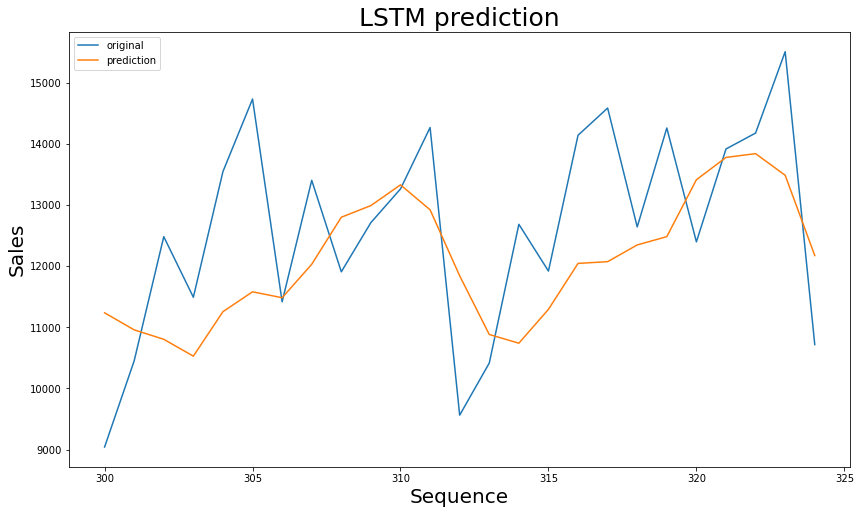

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 66ms/step - loss: 0.1241 - mae: 0.2902


[0.12405888736248016, 0.29020407795906067]